In [41]:
import time
import pandas as pd
from snscrape.modules.twitter import TwitterSearchScraper
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
class Scraper:

    def __init__(self, format=""):
        self.supported_formats = ["csv"]
        if format in self.supported_formats:
            self.format = format
            self.display_only = False
        else:
            print(f"WARNING: format {format} is not supported. Switching to display only")
            self.display_only = True
        return

In [24]:
def scrape(self, filepath=None, query=None, results_count=0, language="en"):

        tweets_max_time = int(time.time()) - 604800

        search = query + " lang:" + language + " since:2022-06-01"
        required_fields = ["id", "url", "date", "renderedContent", "hashtags", "replyCount", "retweetCount", "likeCount"]

        scraped_data = []
        tweets_processed = 0
        chunk_size = 10000

        while tweets_processed < results_count:
            scraping_results = TwitterSearchScraper(search).get_items()
            while tweets_processed < results_count:
                try:
                    tweet = next(scraping_results)
                    tweet.renderedContent = '''%s''' % tweet.renderedContent
                    if tweet.hashtags:
                        tweet.hashtags = str(tweet.hashtags).lstrip('[').rstrip(']')
                        tweet.hashtags = '''%s''' % tweet.hashtags

                except (TypeError, KeyError):
                    continue
                except StopIteration:
                    tweets_max_time -= 3000
                    search = query + " lang:" + language + " until_time:" + str(tweets_max_time)
                    break
                tweets_processed+=1
                if tweets_processed % 100 == 0:
                    print(str(tweets_processed) + " tweets scraped")
                scraped_data.append(tweet)
                if tweets_processed % chunk_size == 0:
                    print("Saving data chunk")
                    scraped_data = pd.DataFrame(scraped_data)[required_fields]
                    self.output(scraped_data)
                    scraped_data = []

        print("Final save")
        if scraped_data != []:
            scraped_data = pd.DataFrame(scraped_data)[required_fields]
            self.output(scraped_data, filepath)

In [25]:
def output(self, scraped_data, filepath):
        if self.display_only:
            print(scraped_data)

        elif self.format == "csv":
            scraped_data.to_csv(filepath, index=False, sep ='|')

Objectifs : 
- analyser les livres demandés
- faire des visualisation (a minima, analyse de nuage de mots et fréquence des bigrammes et trigrammes

In [36]:
war = pd.read_csv('the_art_of_war.csv', error_bad_lines=False)
war

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_14860\4237536282.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  war = pd.read_csv('the_art_of_war.csv', error_bad_lines=False)
b'Skipping line 330: expected 4 fields, saw 8\nSkipping line 340: expected 4 fields, saw 5\nSkipping line 404: expected 4 fields, saw 5\nSkipping line 1283: expected 4 fields, saw 7\nSkipping line 1753: expected 4 fields, saw 6\n'


,,Unnamed: 0,tweets;;;;;
"0,""If you know the enemy &amp; know yourself",you need not fear the result of a hundred battles. If you know yourself but not the enemy,for every victory gained you will also suffer...,you will succumb in every battle.;;;;
;;;;;,NaN,NaN,NaN
"-The Art of War"";;;;;",NaN,NaN,NaN
"1,""Today's Italian American MLB player is Art Ceccarelli, pitched for the KC Athletics, Orioles, &amp;"" Cubs in parts of 5 seasons spanning 1955–1960",served in the Korean War from 1950-52. only LHP to defeat Sandy Koufax in the Coliseum (1959,"10 inn) more: https://t.co/KugMN9Irvo"""""";;;;",NaN
"2,""@Cernovich @rramom59 You are such a drama queen. Have patience. ;;;;;",NaN,NaN,NaN
...,...,...,...
"997,""Know yourself and you will win all battles.;;;;;",NaN,NaN,NaN
;;;;;,NaN,NaN,NaN
"—Sun Tzu, The Art of War"";;;;;",NaN,NaN,NaN
998,@Peterman43 The art of war;;;;;,NaN,NaN


In [40]:
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in war.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

SyntaxError: invalid non-printable character U+00A0 (1803562691.py, line 2)

In [44]:
cloud_generator = WordCloud(background_color='white',random_state=1)

ValueError: WordCloud has not been calculated, call generate first.

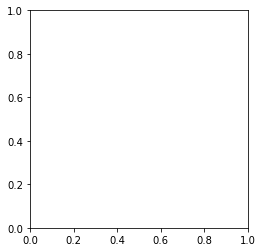

In [46]:
plt.imshow(cloud_generator)
plt.axis("off")
plt.show();

In [27]:
thief = pd.read_csv('the_book_thief.csv')
thief

ParserError: Error tokenizing data. C error: Expected 2 fields in line 9, saw 3
